<a href="https://colab.research.google.com/github/zhreyaa/software_systems/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MT2023179 SHREYA CHAVAN

Question 1 Linear Regression and Regularization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/content/football.csv')
selected_columns = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
                    'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation',
                    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

data = data[selected_columns]
data = pd.get_dummies(data, columns=['preferred_foot'], drop_first=True)

X = data.drop(columns=['overall'])
y = data['overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The Mean Absolute Error : {mae}")
print(f"The Mean Squared Error : {mse}")
print(f"The R2 Score : {r2}")

The Mean Absolute Error : 1.4394225948262425
The Mean Squared Error : 3.5680326558689623
The R2 Score : 0.9050934619184745


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.682e+01, tolerance: 5.349e+00
  model = cd_fast.enet_coordinate_descent(


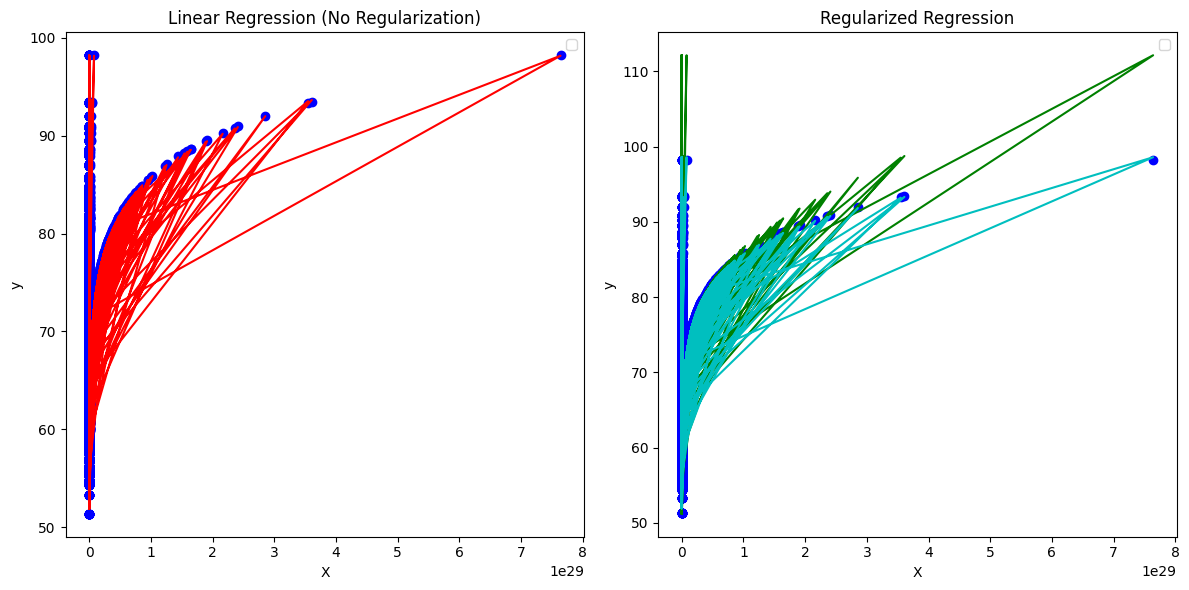

Coefficients (Linear Regression): [ 7.91498229e-30  9.81456230e-18  2.14613563e-20  9.69958199e-24
  1.45740692e-22  6.51896143e-21  2.53347792e-19  8.18005058e-18
  1.99064590e-16  2.80227806e-15 -1.49731295e-16  3.23677438e-18
 -3.53189281e-20  1.94137310e-22 -4.29315179e-25]
Coefficients (Ridge Regression): [ 1.53607707e-14 -9.66979740e-15 -1.39162410e-11  9.21006645e-09
  8.73107631e-09  1.04531781e-07 -7.75548356e-09  2.62866435e-10
 -5.30655951e-12  7.00630792e-14 -6.26744285e-16  3.80009111e-18
 -1.50734752e-20  3.55073803e-23 -3.77622848e-26]
Coefficients (Lasso Regression): [ 0.00000000e+00  9.85618207e-03 -6.27997412e-07 -1.13883322e-07
 -8.97745915e-10 -6.75751415e-12 -4.51906900e-14 -2.32478166e-16
 -3.26700767e-19  1.28735447e-20  2.34318855e-22  2.72077009e-24
  2.37782975e-26  1.35313376e-28 -2.47529594e-31]


In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

test = y_test
pred = y_pred

y_test = np.array(y_pred)

poly = PolynomialFeatures(degree=15, include_bias=False)
y_pred = poly.fit_transform(y_pred.reshape(-1, 1))

# Fit Linear Regression
lr = LinearRegression()
lr.fit(y_pred, y_test)
coefficients_lr = lr.coef_

# Fit Ridge Regression
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(y_pred, y_test)
coefficients_ridge = ridge_reg.coef_

# Fit Lasso Regression
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(y_pred, y_test)
coefficients_lasso = lasso_reg.coef_

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(y_pred, y_test, 'bo')
plt.plot(y_pred, lr.predict(y_pred), 'r-')
plt.legend()
plt.title("Linear Regression (No Regularization)")
plt.xlabel("X")
plt.ylabel("y")

plt.subplot(122)
plt.plot(y_pred, y_test, 'bo')
plt.plot(y_pred, ridge_reg.predict(y_pred), 'g-')
plt.plot(y_pred, lasso_reg.predict(y_pred), 'c-')
plt.legend()
plt.title("Regularized Regression")
plt.xlabel("X")
plt.ylabel("y")

plt.tight_layout()
plt.show()

print("Coefficients (Linear Regression):", coefficients_lr)
print("Coefficients (Ridge Regression):", coefficients_ridge)
print("Coefficients (Lasso Regression):", coefficients_lasso)


Ridge Regression

[ 3.58922473e-11 -1.24505581e-13  6.05835540e-11  2.25193280e-08
 -1.67104290e-06  2.49226131e-07 -1.33037633e-08  3.85333249e-10
 -7.00342645e-12  8.52601137e-14 -7.14444125e-16  4.11592856e-18
 -1.57395202e-20  3.63055721e-23 -3.85611935e-26]


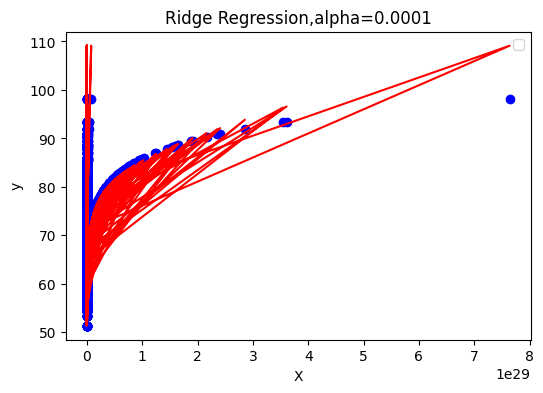

[ 3.88089918e-12 -2.34979295e-14 -6.35438229e-12  1.11824085e-08
 -1.75390632e-07  1.22960341e-07 -8.55889681e-09  2.82889987e-10
 -5.62215681e-12  7.33544510e-14 -6.49851528e-16  3.90884734e-18
 -1.54064657e-20  3.61226933e-23 -3.83223116e-26]


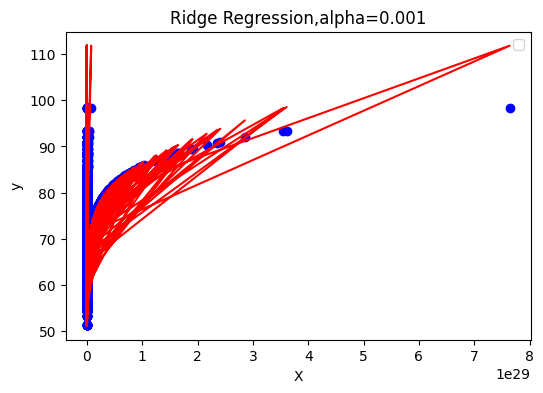

[ 4.01801813e-13 -1.22803066e-14 -1.37736487e-11  9.91951358e-09
 -9.47670701e-09  1.08927158e-07 -8.03053671e-09  2.71457995e-10
 -5.46759853e-12  7.20170274e-14 -6.42547434e-16  3.88511318e-18
 -1.53668458e-20  3.60969779e-23 -3.82909532e-26]


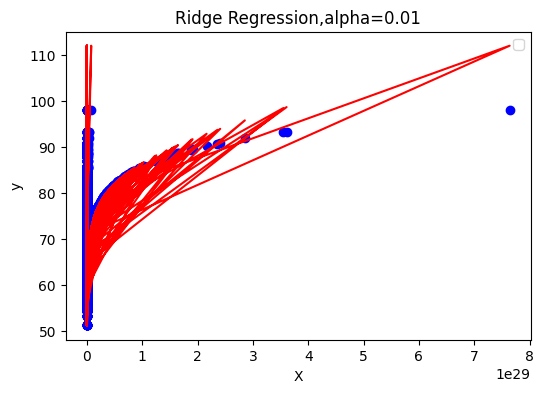

[ 5.07765437e-14 -1.10204035e-14 -1.44606632e-11  9.73929653e-09
  7.27368747e-09  1.07246706e-07 -7.95714839e-09  2.69626284e-10
 -5.43868932e-12  7.17151142e-14 -6.40424659e-16  3.87510594e-18
 -1.53361552e-20  3.60401943e-23 -3.82392838e-26]


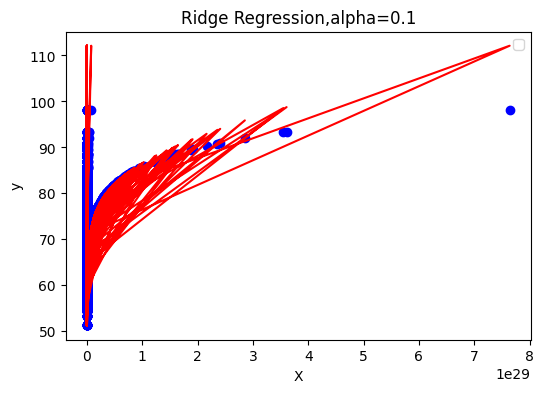

[ 1.53607707e-14 -9.66979740e-15 -1.39162410e-11  9.21006645e-09
  8.73107631e-09  1.04531781e-07 -7.75548356e-09  2.62866435e-10
 -5.30655951e-12  7.00630792e-14 -6.26744285e-16  3.80009111e-18
 -1.50734752e-20  3.55073803e-23 -3.77622848e-26]


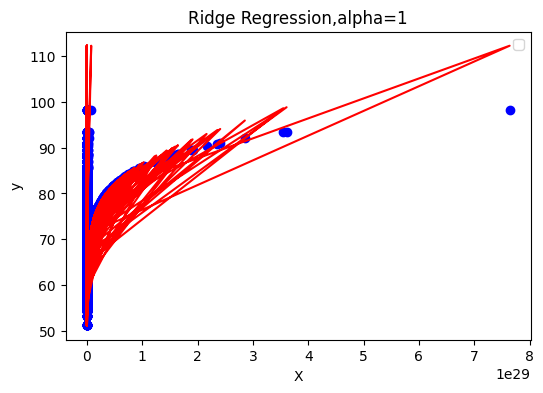

[ 9.61551544e-15  3.12866375e-17 -9.07131577e-12  5.16358067e-09
  7.16215193e-09  8.43646333e-08 -6.21723794e-09  2.10812669e-10
 -4.28370933e-12  5.72276616e-14 -5.20159699e-16  3.21436654e-18
 -1.30190214e-20  3.13358566e-23 -3.40283500e-26]


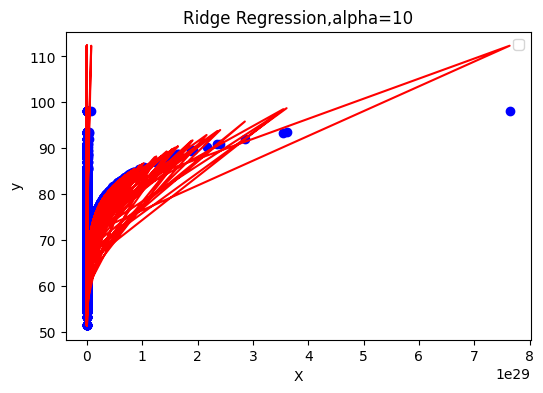

In [ ]:
# Fit a Ridge Regression

alphas=[0.0001,0.001,0.01,0.1,1,10]
for a in alphas:
  ridge_reg = Ridge(alpha=a)
  ridge_reg.fit(y_pred, y_test)
  print(ridge_reg.coef_)
  plt.figure(figsize=(6, 4))
  plt.plot(y_pred, y_test, 'bo')
  plt.plot(y_pred, ridge_reg.predict(y_pred), 'r-')
  plt.legend()
  plt.title("Ridge Regression,alpha="+str(a))
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()

Lasso Regression

[ 9.99994323e-01  4.03711827e-08  8.23281706e-14 -2.57574061e-14
 -2.75424314e-16 -2.94557541e-18 -3.13677664e-20 -3.29610611e-22
 -3.39808808e-24 -3.42492147e-26 -3.36830865e-28 -3.22993988e-30
 -3.02019084e-32 -2.75543476e-34 -2.45480953e-36]


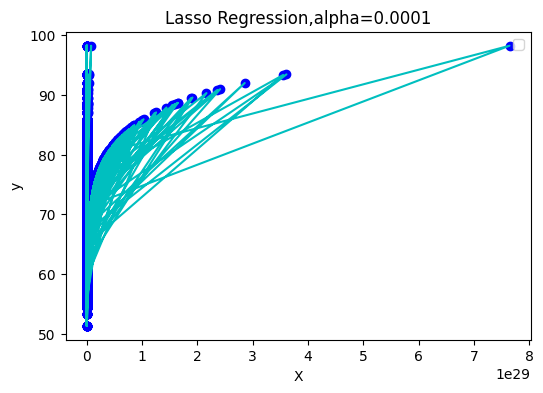

[ 9.99943232e-01  4.03711827e-07  8.23281706e-13 -2.57574061e-13
 -2.75424314e-15 -2.94557541e-17 -3.13677664e-19 -3.29610611e-21
 -3.39808808e-23 -3.42492147e-25 -3.36830865e-27 -3.22993988e-29
 -3.02019084e-31 -2.75543476e-33 -2.45480953e-35]


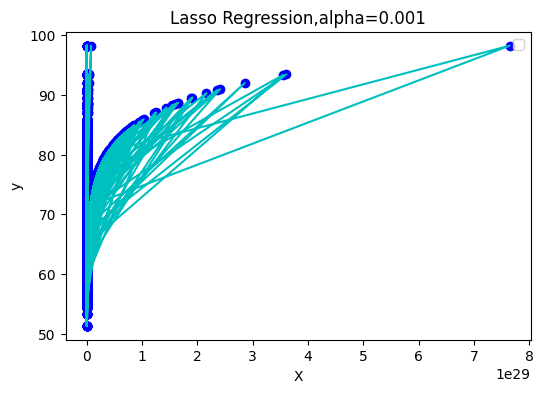

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+01, tolerance: 5.349e+00
  model = cd_fast.enet_coordinate_descent(


[ 8.20550254e-01  1.81543997e-03 -1.55463936e-06 -1.40722228e-08
 -1.17463169e-10 -9.46649720e-13 -7.07363936e-15 -4.59178930e-17
 -2.15144250e-19  6.03068574e-23  1.84897037e-23  3.05686470e-25
  3.59351835e-27  3.44697736e-29  2.67696368e-31]


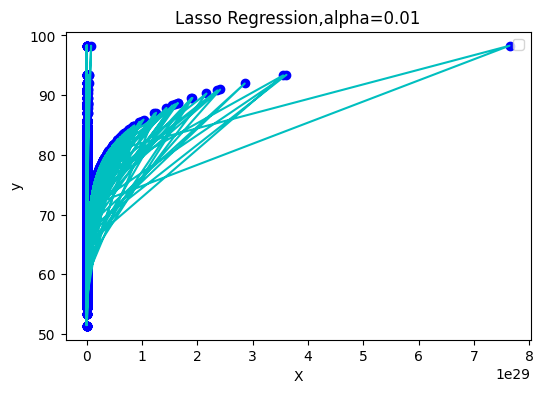

[ 0.00000000e+00  1.02570552e-02 -9.02467715e-06 -8.40290905e-08
 -6.96186982e-10 -5.55406957e-12 -4.08462535e-14 -2.57272906e-16
 -1.10173517e-18  2.11981669e-21  1.24955035e-22  1.91666866e-24
  2.16181241e-26  1.98247409e-28  1.42022074e-30]


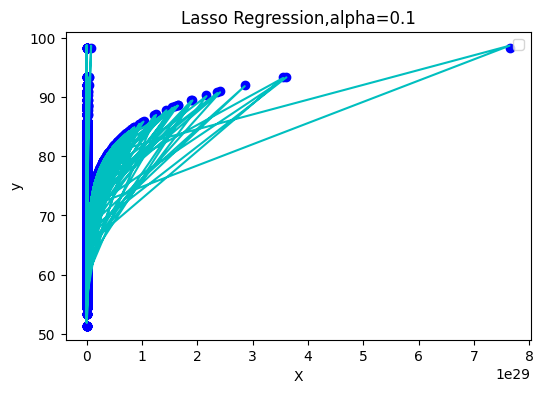

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.682e+01, tolerance: 5.349e+00
  model = cd_fast.enet_coordinate_descent(


[ 0.00000000e+00  9.85618207e-03 -6.27997412e-07 -1.13883322e-07
 -8.97745915e-10 -6.75751415e-12 -4.51906900e-14 -2.32478166e-16
 -3.26700767e-19  1.28735447e-20  2.34318855e-22  2.72077009e-24
  2.37782975e-26  1.35313376e-28 -2.47529594e-31]


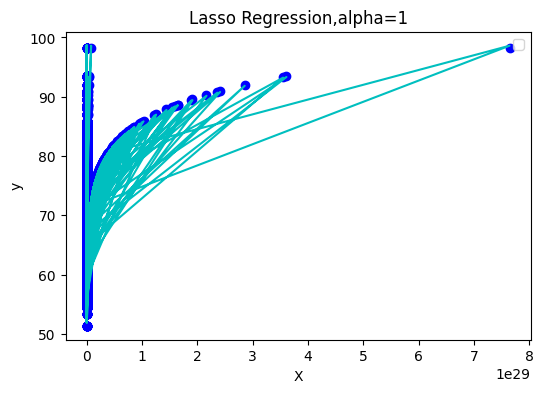

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.946e+01, tolerance: 5.349e+00
  model = cd_fast.enet_coordinate_descent(


[ 0.00000000e+00  1.97364664e-03  1.04589912e-04 -2.11668131e-07
 -1.87678211e-09 -1.51602311e-11 -1.13947109e-13 -7.50060605e-16
 -3.68929074e-18 -2.61524827e-21  2.47173990e-22  4.26022846e-24
  4.96285778e-26  4.56541596e-28  3.16903372e-30]


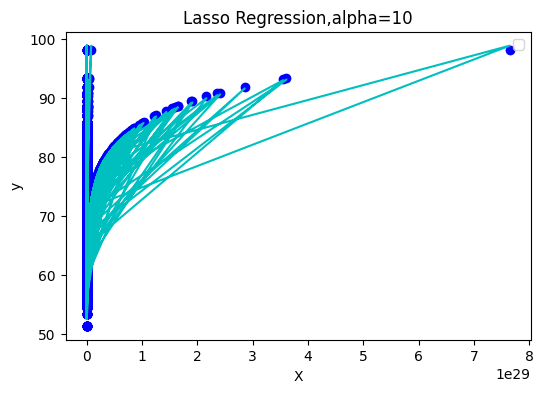

In [ ]:
# Fit Lasso Regression

for a in alphas:
  lasso_reg = Lasso(alpha=a)
  lasso_reg.fit(y_pred, y_test)
  print(lasso_reg.coef_)
  plt.figure(figsize=(6, 4))
  plt.plot(y_pred, y_test, 'bo')
  plt.plot(y_pred, lasso_reg.predict(y_pred), 'c-')
  plt.legend()
  plt.title("Lasso Regression,alpha="+str(a))
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()